# Análisis del Sistema de Metro con Método Montecarlo

Buscamos analizar el sistema del metro desde el punto de vista de la física estadística. Para esto simularemos pasajeros que estaciones de inicio y fin aleatorias pero que siempre toman el camino más corto.

In [1]:
#using PyCall
#@pyimport igraph

In [2]:
using LightGraphs
using GraphLayout #Necesita la paqueteria Compose.jl (i.e. hay que hacer Pkg.add("LightGraphs"), Pkg.add("Compose") y Pkg.add("GraphLayout"))

La documentación del paquete LightGraphs se encuentra en: http://lightgraphsjl.readthedocs.org/en/latest/gettingstarted/

## La Red del Metro del DF

Escribimos todas la líneas del sistema. Una linea es un conjunto de estaciones numeradas tal que entre dos estaciones consecutivas hay una arista. Sin embargo trabajaremos por ahora con los nombres de las estaciones usuales.

In [3]:
Linea1 = String["Observatorio", "Tacubaya", "Juanacatlán", "Chapultepec", "Sevilla", "Insurgentes", "Cuauhtémoc", "Balderas", 
"Salto del Agua", "Isabel la Católica", "Pino Suárez", "Merced", "Candelaria", "San Lázaro", "Moctezuma", "Balbuena",
    "Boulevard Puerto Aéreo", "Gómez Farías", "Zaragoza", "Pantitlán" ];
Linea2 = String["Cuatro Caminos", "Panteones", "Tacuba", "Cuitlahuac", "Popotla", "Colegio Militar", "Normal", "San Cosme", 
    "Revolución", "Hidalgo", "Bellas Artes", "Allende", "Zócalo", "Pino Suárez", "San Antonio Abad", "Chabacano", "Viaducto",
    "Xola", "Villa de Cortés", "Nativitas", "Portales", "Ermita", "General Anaya", "Tasqueña"  ]
Linea3 = String["Indios Verdes", "Deportivo 18 de Marzo", "Potrero", "La Raza", "Tlatelolco", "Guerrero", "Hidalgo", "Juárez",
"Balderas", "Niños Héroes", "Hospital General", "Centro Médico", "Etiopía", "Eugenia", "División del Norte", "Zapata", 
"Coyoacán", "Viveros", "Miguel Angel de Quevedo", "Copilco", "Universidad"]
Linea4 = String["Martín Carrera", "Talismán", "Bondojito", "Consulado", "Canal del Norte", "Morelos", "Candelaria",
    "Fray Servando", "Jamaica", "Santa Anita"]
Linea5 = String["Pantitlán", "Hangares", "Terminal Aérea", "Oceanía", "Aragón", "Eduardo Molina", "Consulado", "Valle Gómez",
"Misterios", "La Raza", "Autobuses del Norte", "Instituto del Petróleo", "Politécnico"]
Linea6 = String["El Rosario", "Tezozomoc", "Azcapotzalco", "Ferrería", "Norte 45", "Vallejo", "Instituto del Petróleo", 
"Lindavista", "Deportivo 18 de Marzo", "La Villa-Basílica", "Martín Carrera"]
Linea7 = String["El Rosario", "Aquiles Sedán", "Camarones", "Refinería", "Tacuba", "San Joaquín", "Polanco", "Auditorio",
"Constituyentes", "Tacubaya", "San Pedro de los Pinos", "San Antonio", "Mixcoac", "Barranca del Muerto"]
Linea8 = String["Garibaldi", "Bellas Artes", "San Juan de Letrán", "Salto del Agua", "Doctores", "Obrera", "Chabacano",
    "La Viga", "Santa Anita", "Coyuya", "Iztacalco", "Apatlaco", "Aculco", "Escuadrón 201", "Atlalilco", "Iztapalapa",
"Cerro de la Estrella", "UAM-I", "Constitución de 1917"];
Linea9 = String["Tacubaya", "Patriotismo", "Chilpancingo", "Centro Médico",  "Lázaro Cárdenas", "Chabacano", "Jamaica", "Mixiuhca"
, "Velódromo", "Ciudad Deportiva", "Puebla", "Pantitlán"]
LineaA = String["Pantitlán", "Agrícola Oriental", "Canal de San Juan", "Tepalcates", "Guelatao", "Peñón Viejo", "Acatitla",
"Santa Marta", "Los Reyes", "La Paz" ]
LineaB = String["Ciudad Azteca", "Plaza Aragón", "Olímpica", "Ecatepec", "Muzquiz", "Río de los Remedios", "Impulsora", 
    "Nezahualcóyotl", "Villa de Aragón", "Bosque de Aragón", "Deportivo Oceanía", "Oceanía", "Romero Rubio", "R. Flores Magón",
    "San Lázaro", "Morelos", "Tepito", "Lagunilla", "Garibaldi", "Guerrero", "Buenavista" ];
Linea12 = String["Mixcoac", "Insurgentes Sur", "Hospital 20 de Noviembre", "Zapata", "Parque de los Venados", "Eje Central",
"Ermita", "Mexicaltzingo", "Atlalilco", "Culhuacán", "San Andrés Tomatlán", "Lomas Estrella", "Calle 11", "Perfiférico Oriente"
    , "Tezonco", "Olivos", "Nopalera", "Zapotitlán", "Tlaltenco", "Tláhuac"];

Hacemos una Arreglo que contenga a todas nuestra líneas para iterar más fácil sobre él.

In [4]:
Lineas = Array{String}[]
push!(Lineas, Linea1)
push!(Lineas, Linea2)
push!(Lineas, Linea3)
push!(Lineas, Linea4)
push!(Lineas, Linea5)
push!(Lineas, Linea6)
push!(Lineas, Linea7)
push!(Lineas, Linea8)
push!(Lineas, Linea9)
push!(Lineas, LineaA)
push!(Lineas, LineaB)
push!(Lineas, Linea12);

In [5]:
stations_lines1 = Int32[length(Linea1)]

1-element Array{Int32,1}:
 20

In [6]:
lines_Length = Int32[] #Lista de la longitud de cada línea
for i = 1:length(Lineas)
    push!(lines_Length, length(Lineas[i]))
end
Lines = length(lines_Length)
N = sum(lines_Length); #N es el número total de estaciones

195

###Creamos nuestra red de metro

**Empezamos a crear nuestra red: MetroNetwork.
Primero unimos las estaciones consecutivas entre líneas.**

In [7]:
MetroNetwork = Graph(N)
function ConnectSimpleNetwork(g, stations_lines) #vamos a sust lines_Length
    s = 1
    for l = 1:length(stations_lines)
        for station in s:stations_lines[l] + s - 2
            add_edge!(g, station, station + 1)
            s += 1
        end
        s += 1
    end
    return g
end

ConnectSimpleNetwork (generic function with 1 method)

In [8]:
n = ConnectSimpleNetwork(MetroNetwork, lines_Length)

{195, 183} undirected graph

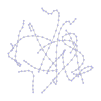

In [9]:
am = full(adjacency_matrix(n))
loc_x, loc_y = layout_spring_adj(am)
draw_layout_adj(am, loc_x, loc_y)#, filename="metro1.svg")

**Ahora tenemos que unir las líneas por las estaciones de trasbordo**

In [10]:
## Pruebo comparar strings...
for stat in Linea1
    if stat == "Observatorio"
        println("works")
    else
        print("otra ")
    end
end

works
otra otra otra otra otra otra otra otra otra otra otra otra otra otra otra otra otra otra otra 

**Definimos una función que si le damos el nombre de la estación, la línea en la que está (Ejemplo Pantitlán de línea 1) y la lista de todas las líneas nos da el número de vértice**

In [11]:
function getStationNumber(station_name, line_num, lines)
    line = lines[line_num]
    if station_name in line
    else
        println("Error, la estación no está en esa línea")
        return "Error"
    end
    ##Acabamos de verificar que la estación esté en la línea
    num_1 = 0 
    for l in lines[1:line_num - 1]
        num_1 += length(l)
    end
    ##Hasta aquí llegamos a una estación antes de la primera de la lista
    num_2 = 0
    for station in line
        num_2 += 1
        if station == station_name
            break
        end
    end
    ##Sumamos estaciones de la misma línea hasta llegar a la que queremos
    return num_1 + num_2
end

getStationNumber (generic function with 1 method)

Probamos la función

In [12]:
a = getStationNumber("Indios Verdes", 3, Lineas)
b = getStationNumber("Pantitlán", 9, Lineas)
println(a)
println(b)

45
144


Funciona!!!

In [13]:
function getStationName(station_number, lines, station_length)
    num = station_length[1]
    l = 0
    stations_so_far = 0
    for i = 1:12 #12 pues tenemos 12 líneas
        if  station_number <= num
            l = i
            break
        end
        #stations_so_far += length(lines[i])
        #println(i + 1)
        num += station_length[i + 1]
        #println("ok")
    end
    #println("ok for")
    #println(l)
    dif =  station_number - num + station_length[l]
    #println(dif)
    return lines[l][dif]
    
end

getStationName (generic function with 1 method)

In [14]:
a = getStationName(195, Lineas, lines_Length)
b = getStationName(144, Lineas, lines_Length)
println(a)
println(b)

Tláhuac
Pantitlán


También Funciona!!! :D

**Ahora si unimos las líneas por las estaciones de trasbordo **

In [15]:
function ConnectLines(Lines, N, lines_Length, graph)
    for i = 1:N
        for j = 1:N
            if i == j 
                continue 
            elseif getStationName(i, Lines, lines_Length) == getStationName(j, Lines, lines_Length)
                if has_edge(graph, i, j)
                else
                    add_edge!(graph, i, j)
                end
            end
        end
    end
    return graph
end

ConnectLines (generic function with 1 method)

In [16]:
MetroNetwork = ConnectLines(Lineas, N, lines_Length, MetroNetwork)

{195, 220} undirected graph

**Graficamos la red **

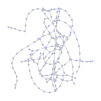

In [17]:
am = full(adjacency_matrix(n))
loc_x, loc_y = layout_spring_adj(am)
draw_layout_adj(am, loc_x, loc_y)#, filename="metro1.svg")

La siguiente función nos da la distancia del vértice $i$ (en este caso 1) a todos los demás vértices. Esto considerando que la distancia entre dos estaciones unidas por una arista es de 1.

In [22]:
distancias_aristas = dijkstra_shortest_paths(MetroNetwork, 1).dists

195-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮  
 14.0
 15.0
 16.0
 17.0
 18.0
 19.0
 20.0
 21.0
 22.0
 23.0
 24.0
 25.0

##Diferencia entre Aristas

El código anterior funciona. Sin embargo queremos distintos tipos de aristas. <br>
* Arista común <br>
* Arista trasbordo <br>
Por distinto tipo de arista en general nos referimos a aristas de distinta longitud. En este caso la longitud es la medida de cuanto tiempo nos toma ir de una estación a otra. <br>
En teoría de gráficas se dice que las aristas tienen distinto peso... para agregarle este peso se utiliza: <br>
 edge_dists[1, 2] = distancia_normal <br>
 Aquí se le la a la arista que une a la estación 1 con la dos el peso distancia_normal (número), sin embargo se debe de hacer para ida y vuelta, es decir debemos de hacer también. <br>
 edge_dists[2, 1] = distancia_normal <br>
 Abajo está el código viejo de lo que tenía que muestra un poco de como funciona... sin embargo con las nuevas funciones se implementa mucho más fácil.
 

In [10]:
function Edge_Distance(N, stations_lines, t_travel, t_stop, t_transit, t_wait)
    edge_dists = zeros(N, N)
    normal_edge = t_travel + t_stop
    transit_edge = t_transit + t_wait
    s = 1
    for l = 1:length(stations_lines)
        for station in s:stations_lines[l] + s - 2
            edge_dists[station, station + 1] = normal_edge
            edge_dists[station + 1, station] = normal_edge
            s += 1
        end
        s += 1
    end
    edge_dists[11, 34] = transit_edge
    edge_dists[8, 53] = transit_edge
    edge_dists[13, 72] = transit_edge
    edge_dists[20, 88] = transit_edge
    edge_dists[2, 109] = transit_edge
    edge_dists[9, 117] = transit_edge
    edge_dists[2, 133] = transit_edge
    edge_dists[20, 144] = transit_edge
    edge_dists[14, 161] = transit_edge
    edge_dists[30, 51] = transit_edge #Linea 2
    edge_dists[23, 104] = transit_edge
    edge_dists[31, 115] = transit_edge 
    edge_dists[36, 120] = transit_edge
    edge_dists[36, 138] = transit_edge
    edge_dists[42, 182] = transit_edge
    edge_dists[48, 79] = transit_edge #Linea 3
    edge_dists[46, 97] = transit_edge
    edge_dists[56, 136] = transit_edge
    edge_dists[50, 156] = transit_edge
    edge_dists[60, 179] = transit_edge
    edge_dists[69, 82] = transit_edge #Linea 4
    edge_dists[66, 99] = transit_edge
    edge_dists[75, 122] = transit_edge
    edge_dists[74, 139] = transit_edge
    edge_dists[71, 160] = transit_edge
    edge_dists[77, 95] = transit_edge #Linea 5
    edge_dists[88, 144] = transit_edge
    edge_dists[88, 145] = transit_edge
    edge_dists[85, 164] = transit_edge
    edge_dists[89, 100] = transit_edge #Linea 6
    edge_dists[109, 133] = transit_edge #Linea 7
    edge_dists[112, 176] = transit_edge 
    edge_dists[120, 138] = transit_edge #linea 8
    edge_dists[114, 157] = transit_edge
    edge_dists[128, 184] = transit_edge
    edge_dists[144, 145] = transit_edge #Linea 9
    ### Other edge
    edge_dists[34, 11] = transit_edge
    edge_dists[53, 8] = transit_edge
    edge_dists[72, 13] = transit_edge
    edge_dists[88, 20] = transit_edge
    edge_dists[109, 2] = transit_edge
    edge_dists[117, 9] = transit_edge
    edge_dists[133, 2] = transit_edge
    edge_dists[144, 20] = transit_edge
    edge_dists[161, 14] = transit_edge
    edge_dists[51, 30] = transit_edge #Linea 2
    edge_dists[104, 23] = transit_edge
    edge_dists[115, 31] = transit_edge
    edge_dists[120, 36] = transit_edge
    edge_dists[138, 36] = transit_edge
    edge_dists[182, 42] = transit_edge
    edge_dists[79, 48] = transit_edge #Linea 3
    edge_dists[97, 46] = transit_edge
    edge_dists[136, 56] = transit_edge
    edge_dists[156, 50] = transit_edge
    edge_dists[179, 60] = transit_edge
    edge_dists[82, 69] = transit_edge #Linea 4
    edge_dists[99, 66] = transit_edge
    edge_dists[122, 75] = transit_edge
    edge_dists[139, 79] = transit_edge
    edge_dists[160, 71] = transit_edge
    edge_dists[95, 77] = transit_edge #Linea 5
    edge_dists[144, 88] = transit_edge
    edge_dists[145, 88] = transit_edge
    edge_dists[164, 85] = transit_edge
    edge_dists[100, 89] = transit_edge #Linea 6
    edge_dists[133, 109] = transit_edge #Linea 7
    edge_dists[176, 112] = transit_edge
    edge_dists[138, 120] = transit_edge #Linea 8
    edge_dists[157, 114] = transit_edge
    edge_dists[184, 128] = transit_edge
    edge_dists[145, 144] = transit_edge #Linea 9
    return edge_dists
end

Edge_Distance (generic function with 1 method)

In [11]:
t_travel = 120
t_stop = 20
t_transit = 120.1
t_wait = 180
edge_dists = Edge_Distance(N, Stations_Lines, t_travel, t_stop, t_transit, t_wait);

In [25]:
D = dijkstra_shortest_paths(MetroNetwork, 1, edge_dists=edge_dists).dists;

In [26]:
D = dijkstra_shortest_paths(MetroNetwork, 1, edge_dists=edge_dists).dists
for i = 2:195
    d = dijkstra_shortest_paths(MetroNetwork, i, edge_dists=edge_dists).dists
    D = hcat(D, d)
end

####Matriz de distancias

In [6]:
D;

LoadError: D not defined
while loading In[6], in expression starting on line 1

In [15]:
maximum(D)

5940.3

In [16]:
round(5.4%1, 1)*10

4.0

## Método Montecarlo

In [18]:
using GraphLayout

In [22]:
function tiempo(D, start_station, end_station, t_stop, t_transit, t_travel, t_wait)
    distance = D[start_station, end_station]
    normal_edge = t_travel + t_stop
    transit_edge = t_transit + t_wait
    n_transit = round(distance%1, 1)*10
    n_stations = (distance - n_transit*transit_edge)/normal_edge
    #return n_transit, n_stations
    t = 0
    for i = 1:n_transit
        t += rand(t_transit) + rand(t_wait)
    end
    for i = 1:n_stations
        t += rand(t_stop) + t_travel
    end
    return t
end

tiempo (generic function with 1 method)

In [23]:
tiempo(D, 109, 93, t_stop, t_transit, t_travel, t_wait)

LoadError: `rand` has no method matching rand(::Float64)
while loading In[23], in expression starting on line 1

In [46]:
function MonteCarloMetro(g, p, N, D, t_stop, t_transit, t_travel, t_wait)
    time_list = zeros(p)
    for i = 1:p
        start_station = rand(1:N)
        end_station = rand(1:N)
        while end_station == start_station
            end_station = rand(1:N)
        end
        time[i] = tiempo(D, start_station, end_station, t_stop, t_transit, t_travel, t_wait)   
    end
    
end

MonteCarloMetro (generic function with 1 method)

In [35]:
#diameter(MetroNetwork)
#diameter(MetroNetwork, [edge_dists])

In [36]:
h = MetroNetwork
am = full(adjacency_matrix(h))
loc_x, loc_y = layout_spring_adj(am)
draw_layout_adj(am, loc_x, loc_y, filename="metro.svg")

In [18]:
distancias_aristas=dijkstra_shortest_paths(MetroNetwork, 1).dists;
floyd_warshall(distancias_aristas)

LoadError: floyd_warshall not defined
while loading In[18], in expression starting on line 2

In [84]:
typeof(distancias_aristas)

Array{Float64,1}

In [ ]:
floyd_warshall(a)

In [73]:
plot(MetroNetwork)

In [52]:
floyd_warshall(edges)

LoadError: `floyd_warshall` has no method matching floyd_warshall(::Function)
while loading In[52], in expression starting on line 1

In [51]:
edges(MetroNetwork)

413-element Array{Edge{Int64},1}:
 edge [1]: 1 -- 2      
 edge [2]: 2 -- 3      
 edge [3]: 3 -- 4      
 edge [4]: 4 -- 5      
 edge [5]: 5 -- 6      
 edge [6]: 6 -- 7      
 edge [7]: 7 -- 8      
 edge [8]: 8 -- 9      
 edge [9]: 9 -- 10     
 edge [10]: 10 -- 11   
 edge [11]: 11 -- 12   
 edge [12]: 12 -- 13   
 edge [13]: 13 -- 14   
 ⋮                     
 edge [402]: 74 -- 139 
 edge [403]: 71 -- 159 
 edge [404]: 77 -- 95  
 edge [405]: 88 -- 144 
 edge [406]: 88 -- 145 
 edge [407]: 85 -- 164 
 edge [408]: 89 -- 100 
 edge [409]: 112 -- 176
 edge [410]: 120 -- 138
 edge [411]: 114 -- 157
 edge [412]: 128 -- 184
 edge [413]: 144 -- 145

In [8]:
add_edge!(g, 1, 2)

edge [1]: 1 -- 2

In [13]:
add_edge!(g, 1, 2)

edge [1]: 1 -- 2

In [ ]:
graph()

In [34]:
h = graph([1, 2, 3], [] , is_directed=false )

Undirected Graph (3 vertices, 0 edges)

In [36]:
add_edge!(h, 1, 2)

LoadError: `add_edge!` has no method matching add_edge!(::GenericGraph{Int64,None,Array{Int64,1},Array{None,1},Array{Array{None,1},1}}, ::Int64, ::Int64, ::Edge{Int64})
while loading In[36], in expression starting on line 1

In [64]:
g = simple_inclist(5)

inputs = [       # each element is (u, v, dist)
    (1, 2, 10.),
    (1, 3, 5.),
    (2, 3, 2.),
    (3, 2, 3.),
    (2, 4, 1.),
    (3, 5, 2.),
    (4, 5, 4.),
    (5, 4, 6.),
    (5, 1, 7.),
    (3, 4, 9.) ]

ne = length(g1_wedges)
dists = zeros(ne)

for i = 1 : ne
    a = inputs[i]
    add_edge!(g1, a[1], a[2])   # add edge
    dists[i] = a[3]             # set distance
end

r = dijkstra_shortest_paths(g, dists, 1)

@assert r.parents == [1, 3, 1, 2, 3]
@assert r.dists == [0., 8., 5., 9., 7.]

LoadError: g1_wedges not defined
while loading In[64], in expression starting on line 15